In [1]:
pwd

'/content'

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
pwd

'/content/drive/MyDrive/zoomcamp2024'

In [18]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 14.90 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


In [19]:
ls

clothing-dataset-small/


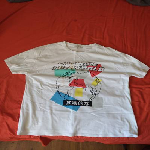

In [24]:
load_img('/content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/train/t-shirt/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg', target_size=(150, 150))

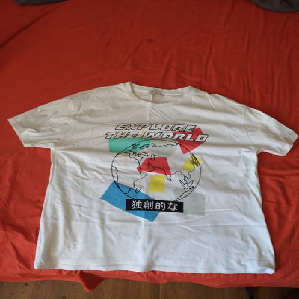

In [28]:
path = '/content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/train/t-shirt'
name = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(299, 299))